In [30]:
import plotly.express as px
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point,Polygon
import descartes
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [24]:
myShapefile = gpd.read_file ('C:/Users/vasuk/Downloads/tl_2022_us_zcta520 (1)/tl_2022_us_zcta520.shp')
myShapefile

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,47236,47236,B5,G6350,S,1029063,0,+39.1517426,-085.7252769,"POLYGON ((-85.73410 39.15597, -85.72794 39.156..."
1,47870,47870,B5,G6350,S,8830,0,+39.3701518,-087.4735141,"POLYGON ((-87.47414 39.37016, -87.47409 39.370..."
2,47851,47851,B5,G6350,S,53326,0,+39.5735839,-087.2459559,"POLYGON ((-87.24769 39.57450, -87.24711 39.574..."
3,47337,47337,B5,G6350,S,303089,0,+39.8027537,-085.4372850,"POLYGON ((-85.44357 39.80328, -85.44346 39.803..."
4,47435,47435,B5,G6350,S,13302,0,+39.2657557,-086.2951577,"POLYGON ((-86.29592 39.26547, -86.29592 39.266..."
...,...,...,...,...,...,...,...,...,...,...
33786,37932,37932,B5,G6350,S,75093217,4374995,+35.9172993,-084.1987873,"POLYGON ((-84.27347 35.93928, -84.27287 35.940..."
33787,37341,37341,B5,G6350,S,87434962,27139990,+35.2199309,-085.0730025,"POLYGON ((-85.15090 35.11231, -85.15088 35.112..."
33788,37849,37849,B5,G6350,S,102931713,896866,+36.0540502,-084.0484876,"POLYGON ((-84.14857 36.04234, -84.14240 36.046..."
33789,37754,37754,B5,G6350,S,99003113,145391,+36.1390993,-084.0298007,"POLYGON ((-84.10549 36.11168, -84.10543 36.111..."


<AxesSubplot:>

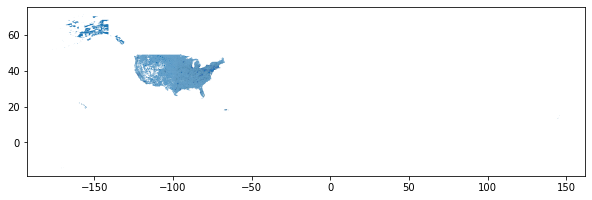

In [55]:
fig,ax = plt.subplots(figsize = (10,10))
myShapefile.plot(ax=ax)

In [ ]:
myShapefile.info()

In [56]:
df= pd.read_csv('C:/Users/vasuk/Downloads/tl_2022_us_zcta520 (1)/tl_2022_us_zcta520.csv')
crs={'init': 'epsg:4326'}
df.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20
0,47236,47236,B5,G6350,S,1029063,0,39.151743,-85.725277
1,47870,47870,B5,G6350,S,8830,0,39.370152,-87.473514
2,47851,47851,B5,G6350,S,53326,0,39.573584,-87.245956
3,47337,47337,B5,G6350,S,303089,0,39.802754,-85.437285
4,47435,47435,B5,G6350,S,13302,0,39.265756,-86.295158


In [28]:
geometry = [Point(xy) for xy in zip(df["INTPTLON20"], df["INTPTLAT20"])]
geometry[:3]

In [18]:
geo_df=gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

C:\Users\vasuk\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,47236,47236,B5,G6350,S,1029063,0,39.151743,-85.725277,POINT (-85.72528 39.15174)
1,47870,47870,B5,G6350,S,8830,0,39.370152,-87.473514,POINT (-87.47351 39.37015)
2,47851,47851,B5,G6350,S,53326,0,39.573584,-87.245956,POINT (-87.24596 39.57358)
3,47337,47337,B5,G6350,S,303089,0,39.802754,-85.437285,POINT (-85.43729 39.80275)
4,47435,47435,B5,G6350,S,13302,0,39.265756,-86.295158,POINT (-86.29516 39.26576)


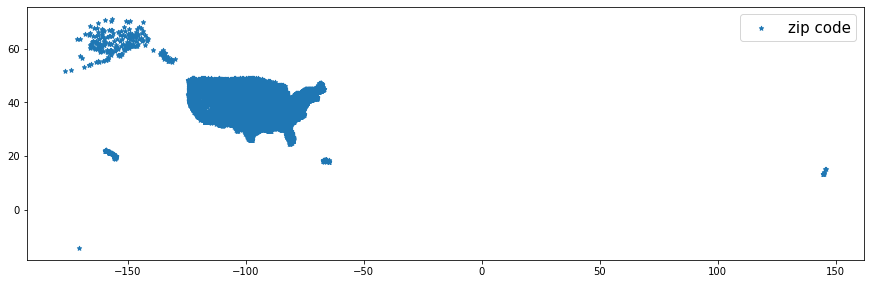

In [65]:
fig,ax = plt.subplots(figsize= (15,15))
myShapefile.plot(ax = ax, alpha = 1, color="white")
geo_df.plot(ax=ax, markersize=20 , marker="*", label="zip code")
plt.legend(prop={'size': 15})